In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# @title Define the success model
def success(inc_total_orders, inc_interact_rate, inc_attempt_rate, inc_complete_rate, labels):
    total_orders = 7441 + inc_total_orders
    num_interact = total_orders * (0.476 + inc_interact_rate)
    num_attempt = num_interact * (0.761 + inc_attempt_rate)
    num_complete = num_attempt * (0.329 + inc_complete_rate)
    num_complete = int(num_complete)

    pullthrough = str(round((num_complete*100) / num_interact, 0)) + '%'
    conversion = str(round((num_complete*100) / total_orders, 0)) + '%'
    revenue = round(15 * num_complete, 2)

    if labels == 1:
        total_orders_str = 'Orders Started: ' + str(total_orders)
        num_complete_str = 'Orders Completed: ' + str(round(num_complete, 0))
        pullthrough_str = 'Pullthrough: ' + pullthrough
        conversion_str = 'Conversion: ' + conversion
        revenue_str = 'Revenue: $' + str(revenue)

        return total_orders_str, num_complete_str, pullthrough_str, conversion_str, revenue_str

    elif labels == 0:
        return total_orders, num_complete, pullthrough, conversion, revenue

    else:
        return 'Error: Must put 0 or 1 into the labels argument'


In [8]:
# @title Define the baseline and a model with increases
baseline = success(0, 0, 0, 0, 0)
increase_model = success(1000, 0.05, 0.05, 0.05, 0)

model_data = pd.DataFrame([baseline, increase_model], columns=['Total Orders', 'Completed Orders', 'Pullthrough', 'Conversion', 'Revenue'])
model_data.index = ['Baseline', 'Model (based on inputs)']
model_data

,Total Orders,Completed Orders,Pullthrough,Conversion,Revenue
Baseline,7441,886,25.0%,12.0%,13290
Model (based on inputs),8441,1364,31.0%,16.0%,20460


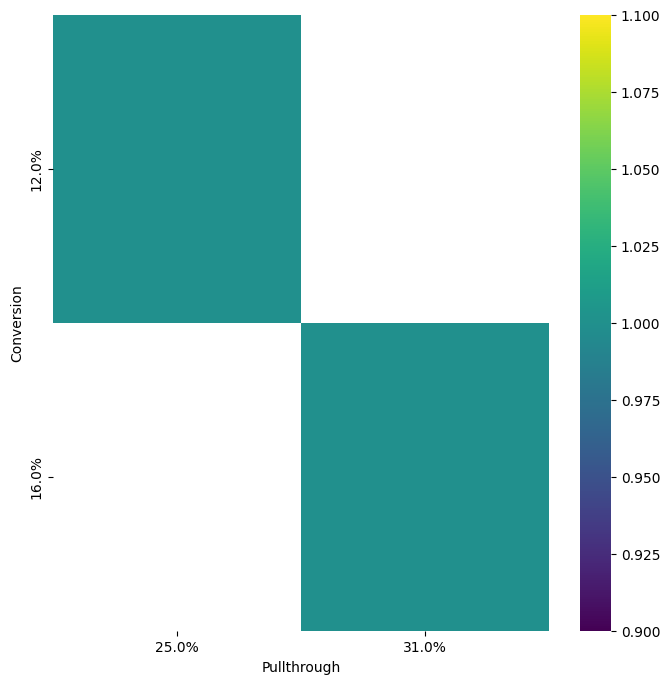

In [5]:
# @title Pullthrough vs Conversion

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Conversion'].value_counts()
    for x_label, grp in model_data.groupby('Pullthrough')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Pullthrough')
_ = plt.ylabel('Conversion')

In [6]:
# @title Calculate isolated impacts from a 1% increase
baseline_rev = success(0, 0, 0, 0, 0)[4]
oneperc_orders_rev = success(74, 0, 0, 0, 0)[4]
oneperc_interaction_rev = success(0, 0.01, 0, 0, 0)[4]
oneperc_attempted_rev = success(0, 0, 0.01, 0, 0)[4]
oneperc_completed_rev = success(0, 0, 0, 0.01, 0)[4]

Diff_baseline = 0
Diff_baseline_orders = oneperc_orders_rev - baseline_rev
Diff_baseline_interaction = oneperc_interaction_rev - baseline_rev
Diff_baseline_attempted = oneperc_attempted_rev - baseline_rev
Diff_baseline_completed = oneperc_completed_rev - baseline_rev

isolated_list = [baseline_rev, oneperc_orders_rev, oneperc_interaction_rev, oneperc_attempted_rev, oneperc_completed_rev]
Diffs_list = [Diff_baseline, Diff_baseline_orders, Diff_baseline_interaction, Diff_baseline_attempted, Diff_baseline_completed]
isolated_metricsdf = pd.DataFrame(list(zip(isolated_list, Diffs_list)), columns=['Estimated Revenue', 'Difference from Baseline'])
isolated_metricsdf.index = ['Baseline Revenue', '1% inc Total Orders', '1% inc Interaction', '1% inc Attempted Login', '1% inc Completed Login']
isolated_metricsdf

,Estimated Revenue,Difference from Baseline
Baseline Revenue,13290,0
1% inc Total Orders,13425,135
1% inc Interaction,13575,285
1% inc Attempted Login,13470,180
1% inc Completed Login,13695,405


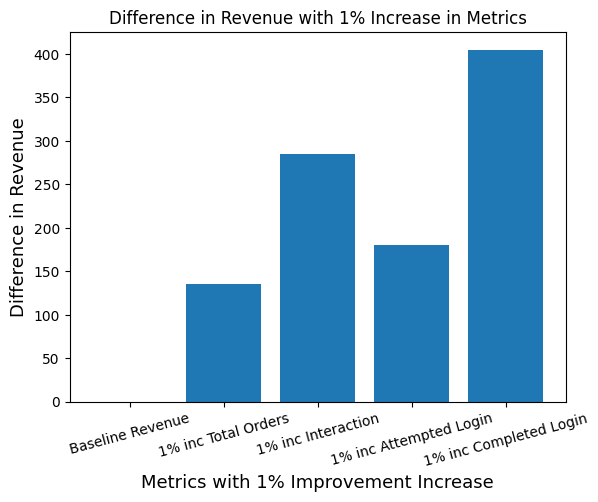

In [7]:
# @title Plot the differences in revenue
plt.bar(isolated_metricsdf.index, Diffs_list)
plt.xticks(rotation=15)
plt.ylabel('Difference in Revenue', fontsize=13)
plt.xlabel('Metrics with 1% Improvement Increase', fontsize=13)
plt.title('Difference in Revenue with 1% Increase in Metrics')
plt.show()